<a href="https://colab.research.google.com/github/hootloot/AI-Chat-Website/blob/main/testingtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PART 1 (GETTING BIODATA FROM CHEMBL DATABASE)**

In [1]:
! pip uninstall chembl_webresource_client
! pip install chembl_webresource_client

     |████████████████████████████████| 55 kB 1.1 MB/s 
     |████████████████████████████████| 596 kB 12.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.0.1 which is incompatible.


In [2]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

# Target search for acetylocholinesterase
target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets

#pics the 1st option on the chembl search, therefore these results should be present to whoever is using the software
#the target protein data should be up to the user
selected_target = targets.target_chembl_id[0]
selected_target

activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

df = pd.DataFrame.from_dict(res)

#df

df.to_csv('acetylcholinesterase_01_bioactivity_data_raw.csv', index=False)


df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
#df2

len(df2.canonical_smiles.unique())

df2_nr = df2.drop_duplicates(['canonical_smiles'])
df2_nr


selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
#df3

df3.to_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv', index=False)


df4 = pd.read_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

bioactivity_threshold = []
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
#df5


df5.to_csv('acetylcholinesterase_03_bioactivity_data_curated.csv', index=False)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [3]:
! zip acetylcholinesterase.zip *.csv

! ls -l

  adding: acetylcholinesterase_01_bioactivity_data_raw.csv (deflated 91%)
  adding: acetylcholinesterase_02_bioactivity_data_preprocessed.csv (deflated 81%)
  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 82%)
total 5076
-rw-r--r-- 1 root root 3870914 Feb  6 02:55 acetylcholinesterase_01_bioactivity_data_raw.csv
-rw-r--r-- 1 root root  374458 Feb  6 02:55 acetylcholinesterase_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root  420828 Feb  6 02:55 acetylcholinesterase_03_bioactivity_data_curated.csv
-rw-r--r-- 1 root root  516574 Feb  6 02:55 acetylcholinesterase.zip
drwxr-xr-x 1 root root    4096 Feb  1 14:32 sample_data


# **PART 2 (VISUAL DATA ANAYLSIS)**

In [4]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y

--2022-02-06 02:55:25--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   162MB/s    in 0.5s    

2022-02-06 02:55:25 (162 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:116: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


this process is done


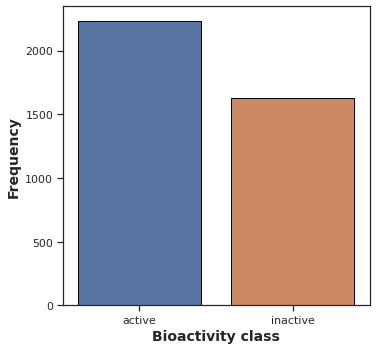

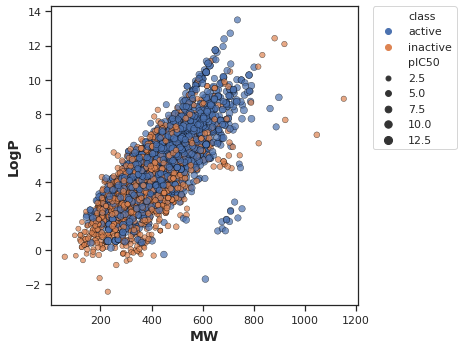

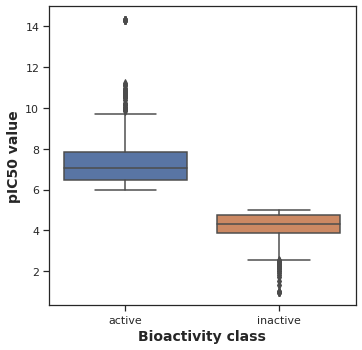

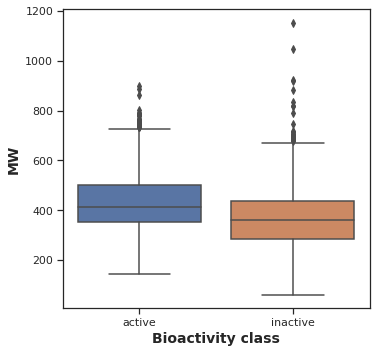

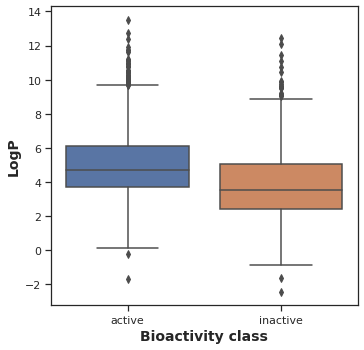

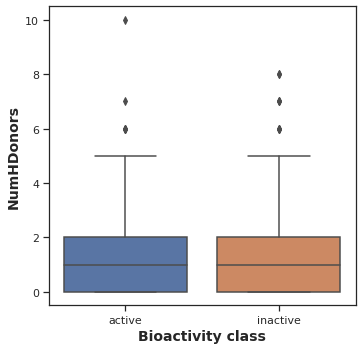

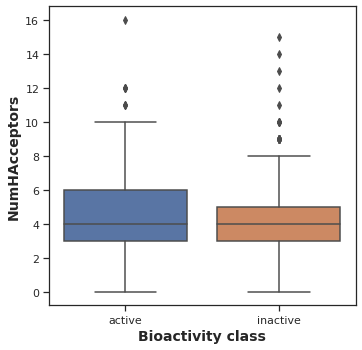

In [5]:
import sys

#opens
sys.path.append('/usr/local/lib/python3.7/site-packages/')
#! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_03_bioactivity_data_curated.csv

import pandas as pd

df = pd.read_csv('acetylcholinesterase_03_bioactivity_data_curated.csv')
#df

df_no_smiles = df.drop(columns='canonical_smiles')

smiles = []

for i in df.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
#df_clean_smiles

import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
#df_lipinski


#compare two dataframes
#df_lipinski
#df
#below combined

df_combined = pd.concat([df,df_lipinski], axis=1)
#df_combined

"""### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column
"""

# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

df_combined.standard_value.describe()

-np.log10( (10**-9)* 100000000 )

-np.log10( (10**-9)* 10000000000 )

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x


df_norm = norm_value(df_combined)
#df_norm

df_norm.standard_value_norm.describe()

df_final = pIC50(df_norm)
#df_final

df_final.pIC50.describe()

df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

df_2class = df_final[df_final['class'] != 'intermediate']
#df_2class

df_2class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv')


#graphing

import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt


plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.png')

"""### **Scatter plot of MW versus LogP**

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.
"""

plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.png')

"""### **Box plots**

#### **pIC50 value**
"""

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.png')

"""**Statistical analysis | Mann-Whitney U Test**"""

def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

mannwhitney('pIC50')

"""#### **MW**"""

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.png')

mannwhitney('MW')

"""#### **LogP**"""

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.png')

"""**Statistical analysis | Mann-Whitney U Test**"""

mannwhitney('LogP')

"""#### **NumHDonors**"""

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.png')

"""**Statistical analysis | Mann-Whitney U Test**"""

mannwhitney('NumHDonors')

"""#### **NumHAcceptors**"""

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.png')

mannwhitney('NumHAcceptors')

print('this process is done')


In [6]:
#saves as zip
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 13%)
  adding: acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv (deflated 76%)
  adding: acetylcholinesterase_02_bioactivity_data_preprocessed.csv (deflated 81%)
  adding: mannwhitneyu_LogP.csv (deflated 9%)
  adding: acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv (deflated 76%)
  adding: acetylcholinesterase_01_bioactivity_data_raw.csv (deflated 91%)
  adding: mannwhitneyu_MW.csv (deflated 10%)
  adding: acetylcholinesterase_03_bioactivity_data_curated.csv (deflated 82%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 11%)
  adding: mannwhitneyu_pIC50.csv (deflated 14%)


# **PART 3 (SETTING UP MODEL)**

In [7]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
! unzip padel.zip

--2022-02-06 02:56:45--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2022-02-06 02:56:45--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M   160MB/s    in 0.2s    

2022-02-06 02:56:46 (160 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2022-02-06 02:56:46--  https://github

In [8]:
#! wget https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv

import pandas as pd

df3 = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

#df3

selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [9]:
! cat molecule.smi | head -5
! cat molecule.smi | wc -l

CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1	CHEMBL133897
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1	CHEMBL336398
CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1	CHEMBL131588
O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F	CHEMBL130628
CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C	CHEMBL130478
5103


In [10]:
"""## **Calculate fingerprint descriptors**

### **Calculate PaDEL descriptors**
"""

! cat padel.sh
! bash padel.sh
! ls -l

Streaming output truncated to the last 5000 lines.
Processing CHEMBL160219 in molecule.smi (133/5103). Average speed: 0.27 s/mol.
Processing CHEMBL445916 in molecule.smi (134/5103). Average speed: 0.27 s/mol.
Processing CHEMBL85473 in molecule.smi (135/5103). Average speed: 0.27 s/mol.
Processing CHEMBL314502 in molecule.smi (136/5103). Average speed: 0.28 s/mol.
Processing CHEMBL87320 in molecule.smi (137/5103). Average speed: 0.28 s/mol.
Processing CHEMBL87280 in molecule.smi (138/5103). Average speed: 0.28 s/mol.
Processing CHEMBL348607 in molecule.smi (139/5103). Average speed: 0.28 s/mol.
Processing CHEMBL313809 in molecule.smi (140/5103). Average speed: 0.28 s/mol.
Processing CHEMBL87849 in molecule.smi (141/5103). Average speed: 0.28 s/mol.
Processing CHEMBL314398 in molecule.smi (142/5103). Average speed: 0.28 s/mol.
Processing CHEMBL87373 in molecule.smi (143/5103). Average speed: 0.28 s/mol.
Processing CHEMBL156931 in molecule.smi (144/5103). Average speed: 0.28 s/mol.
Proces

In [11]:
"""## **Preparing the X and Y Data Matrices**

### **X data matrix**
"""

df3_X = pd.read_csv('descriptors_output.csv')
#df3_X

df3_X = df3_X.drop(columns=['Name'])
#df3_X

"""## **Y variable**

### **Convert IC50 to pIC50**
"""

df3_Y = df3['pIC50']
#df3_Y

"""## **Combining X and Y variable**"""

dataset3 = pd.concat([df3_X,df3_Y], axis=1)
#dataset3

dataset3.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)



# **PART 4 (CREATING MODEL)**

Mean squared error (MSE): 0.34
Coefficient of determination (R^2): 0.86


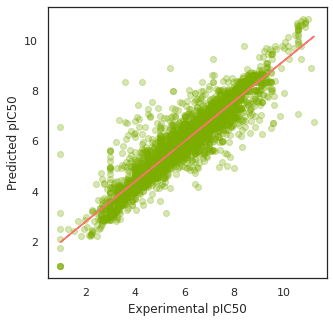

In [46]:
import pandas as pd

dataset_url = 'https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_url)
X = dataset.drop(['pIC50'], axis=1)
Y = dataset.iloc[:,-1]
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X.to_csv('descriptor_list.csv', index = False)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)

Y_pred = model.predict(X)

print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

plt.savefig('model_scatter_plot.png')


import pickle 
pickle.dump(model, open('acetylcholinesterase_model.pkl', 'wb'))

# **PART 5 (COMPARING MODEL PERFORMACE)**

In [42]:
! pip uninstall lazypredict
! pip install lazypredict   
! pip uninstall sckit-learn -y
! pip install scikit-learn==0.23.1
#! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

Found existing installation: lazypredict 0.2.9
Uninstalling lazypredict-0.2.9:
  Would remove:
    /usr/local/bin/lazypredict
    /usr/local/lib/python3.7/site-packages/lazypredict-0.2.9.dist-info/*
    /usr/local/lib/python3.7/site-packages/lazypredict/*
Proceed (y/n)? y
  Successfully uninstalled lazypredict-0.2.9
  Using cached lazypredict-0.2.9-py2.py3-none-any.whl (12 kB)


In [43]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

"""## **2. Load the data set**

"""

#! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

X = df.drop('pIC50', axis=1)
Y = df.pIC50

"""## **3. Data pre-processing**"""

# Examine X dimension
#X.shape

# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
#X.shape

# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

"""## **4. Compare ML algorithms**"""

# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

ModuleNotFoundError: ignored

The Data is visualized here

In [ ]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))
plt.savefig('r_squared.png')

In [ ]:
# Bar plot of RMSE values
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))
plt.savefig('RMSE_model.png')

In [ ]:
# Bar plot of calculation time
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))
plt.savefig('timetaken.png')
print('done')

**PART 6 (STREAMLIT)**

In [ ]:
print('done')